In [1]:
import numpy as np
import h5py
import pickle
import sys
import os
import matplotlib.pyplot as plt

current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

import src.models as models 

In [2]:

with h5py.File("scaling_params_regressorV3.h5", "r") as f:
    
    seed_vec_base = f['results/seed'][:]
    hidden_vec_base = f['results/hidden'][:]
    loss_net_vec_base = f['results/loss_net'][:]
    loss_proj_vec_base = f['results/loss_proj'][:]
    pickled_config_base = f['results/config'][()]

config = pickle.loads(pickled_config_base)


unique_hidden_base = np.unique(hidden_vec_base)
loss_net_base_dict = {ele: [] for ele in unique_hidden_base}
loss_proj_base_dict = {ele: [] for ele in unique_hidden_base}

for i in range(len(seed_vec_base)):
    
    loss_net_base_dict[hidden_vec_base[i]].append(loss_net_vec_base[i])
    loss_proj_base_dict[hidden_vec_base[i]].append(loss_proj_vec_base[i])


rmse_net_base_dict = {}
for i, (size, vec) in enumerate(loss_net_base_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_net_base_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))

rmse_proj_base_dict = {}
for i, (size, vec) in enumerate(loss_proj_base_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_proj_base_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))
    

In [3]:
with h5py.File("scaling_params_pcdae_sine_0.05_Vnew.h5", "r") as f:
    
    seed_vec_pcdae = f['results/seed'][:]
    hidden_vec_pcdae = f['results/hidden'][:]
    loss_init_pcdae = f['results/loss_init'][:]
    loss_refine1_pcdae = f['results/loss_refine1'][:]
    loss_refine2_pcdae = f['results/loss_refine2'][:]
    pickled_config = f['results/config'][()]

config_pcdae = pickle.loads(pickled_config)


unique_hidden_pcdae = np.unique(hidden_vec_pcdae)
loss1_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}
loss2_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}


for i in range(len(seed_vec_pcdae)):
    loss1_pcdae_dict[hidden_vec_pcdae[i]].append(loss_refine1_pcdae[i])
    loss2_pcdae_dict[hidden_vec_pcdae[i]].append(loss_refine2_pcdae[i])


rmse1_pcdae_dict = {}
for i, (size, vec) in enumerate(loss1_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse1_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))

rmse2_pcdae_dict = {}
for i, (size, vec) in enumerate(loss2_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse2_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))
    


In [4]:
with h5py.File("scaling_params_ebm_pcdae_sine_0.05_Vnew.h5", "r") as f:
    
    seed_vec_pcdae = f['results/seed'][:]
    hidden_vec_pcdae = f['results/hidden'][:]
    loss_init_pcdae = f['results/loss_init'][:]
    loss_refine_ebm_pcdae = f['results/loss_refine'][:]
    pickled_config = f['results/config'][()]

config_pcdae = pickle.loads(pickled_config)


unique_hidden_pcdae = np.unique(hidden_vec_pcdae)
loss_ebm_pcdae_dict = {ele: [] for ele in unique_hidden_pcdae}


for i in range(len(seed_vec_pcdae)):
    loss_ebm_pcdae_dict[hidden_vec_pcdae[i]].append(loss_refine_ebm_pcdae[i])


rmse_ebm_pcdae_dict = {}
for i, (size, vec) in enumerate(loss_ebm_pcdae_dict.items()):
    vec_sqrt = np.sqrt(vec)
    rmse_ebm_pcdae_dict[size] = (np.mean(vec_sqrt), np.std(vec_sqrt))


In [5]:
print(rmse1_pcdae_dict)
print(rmse_ebm_pcdae_dict)

{25: (0.03892328244711214, 0.012761811057688288), 35: (0.03209940911568902, 0.011635751777223721), 47: (0.030230900676482424, 0.011297122537077372), 58: (0.03237109134331768, 0.014711895105571646), 68: (0.033561320069798714, 0.015360580491637054), 85: (0.03432773354508564, 0.016583365783693158)}
{25: (0.03645028776376201, 0.015570964785782074), 35: (0.029720995114591486, 0.010124212226252895), 47: (0.032365060774387444, 0.014800318191074057), 58: (0.030925890463342053, 0.01381257177405546), 68: (0.03538006023759406, 0.01840676841551432), 85: (0.033029740666300315, 0.014671696845790286)}


In [6]:
### parameters count regressor

input_size = 3
output_size = 17

parameters_base = []
rmse_net_mean_base = []
rmse_net_std_base = []
rmse_proj_mean_base = []
rmse_proj_std_base = []

for size in unique_hidden_base[:-3]:
    hidden_sizes = [size, size]
    model_loaded = models.Regressor(input_size=input_size, output_size=output_size, hidden_sizes=hidden_sizes)
    params = models.count_parameters(model_loaded)
    
    parameters_base.append(params)
    mean, std = rmse_net_base_dict[size]
    rmse_net_mean_base.append(mean)
    rmse_net_std_base.append(std)
    
    mean, std = rmse_proj_base_dict[size]
    rmse_proj_mean_base.append(mean)
    rmse_proj_std_base.append(std)

rmse_net_mean_base = np.array(rmse_net_mean_base)
rmse_net_std_base = np.array(rmse_net_std_base)

rmse_proj_mean_base = np.array(rmse_proj_mean_base)
rmse_proj_std_base = np.array(rmse_proj_std_base)

input_size = 3
output_size = 17

parameters_pcdae = []
rmse1_mean_pcdae = []
rmse1_std_pcdae = []
rmse2_mean_pcdae = []
rmse2_std_pcdae = []

rmse_mean_ebm_pcdae = []
rmse_std_ebm_pcdae = []


for size in unique_hidden_pcdae:
    hidden_dim = size
    model_loaded = models.PCDAE(x_dim=input_size, y_dim=output_size, hidden_dim=size)
    params = models.count_parameters(model_loaded)
    
    parameters_pcdae.append(params)
    mean, std = rmse1_pcdae_dict[size]
    rmse1_mean_pcdae.append(mean)
    rmse1_std_pcdae.append(std)
    
    mean, std = rmse2_pcdae_dict[size]
    rmse2_mean_pcdae.append(mean)
    rmse2_std_pcdae.append(std)
    
    mean, std = rmse_ebm_pcdae_dict[size]
    rmse_mean_ebm_pcdae.append(mean)
    rmse_std_ebm_pcdae.append(std)



rmse1_mean_pcdae = np.array(rmse1_mean_pcdae)
rmse2_mean_pcdae = np.array(rmse2_mean_pcdae)

rmse1_std_pcdae = np.array(rmse1_std_pcdae)
rmse2_std_pcdae = np.array(rmse2_std_pcdae)

rmse_mean_ebm_pcdae = np.array(rmse_mean_ebm_pcdae)
rmse_std_ebm_pcdae = np.array(rmse_std_ebm_pcdae)


In [7]:

### ebm sizes
hidden_sizes = [25, 35, 47, 58, 68, 85]
x_dim = 3
y_dim = 17

ebm_params_vec = []

for i in range(len(hidden_sizes)):
    pcdae_ebm = models.PCDAE_EBM(x_dim=x_dim, y_dim=y_dim, hidden_dim=hidden_sizes[i])
    params_size = models.count_parameters(pcdae_ebm)
    ebm_params_vec.append(params_size)


ebm_params_arr = np.array(ebm_params_vec)


In [8]:
print(ebm_params_arr)

[ 3088  4868  7532 10480 13580 19768]


In [9]:
print(rmse_ebm_pcdae_dict)

{25: (0.03645028776376201, 0.015570964785782074), 35: (0.029720995114591486, 0.010124212226252895), 47: (0.032365060774387444, 0.014800318191074057), 58: (0.030925890463342053, 0.01381257177405546), 68: (0.03538006023759406, 0.01840676841551432), 85: (0.033029740666300315, 0.014671696845790286)}


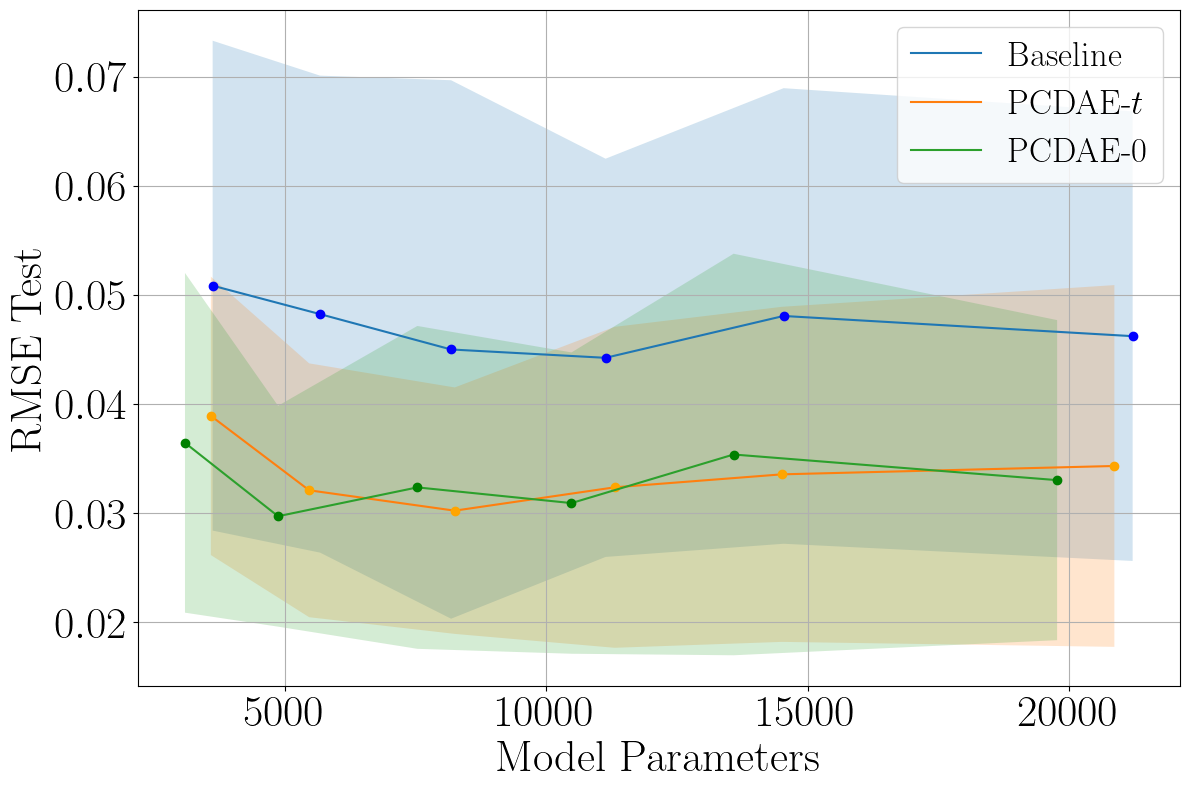

In [14]:

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'



plt.plot(parameters_base, rmse_proj_mean_base, label="Baseline")
plt.plot(parameters_base, rmse_proj_mean_base, 'o', color="blue")
plt.fill_between(parameters_base,
                    rmse_proj_mean_base - rmse_proj_std_base,
                    rmse_proj_mean_base + rmse_proj_std_base,
                    alpha=0.2)


plt.plot(parameters_pcdae, rmse1_mean_pcdae, label=r"PCDAE-$t$")
plt.plot(parameters_pcdae, rmse1_mean_pcdae, 'o', color="orange")
plt.fill_between(parameters_pcdae,
                    rmse1_mean_pcdae - rmse1_std_pcdae,
                    rmse1_mean_pcdae + rmse1_std_pcdae,
                    alpha=0.2)



plt.plot(ebm_params_arr, rmse_mean_ebm_pcdae, label="PCDAE-$0$")
plt.plot(ebm_params_arr, rmse_mean_ebm_pcdae, 'o', color="green")
plt.fill_between(ebm_params_arr,
                    rmse_mean_ebm_pcdae - rmse_std_ebm_pcdae,
                    rmse_mean_ebm_pcdae + rmse_std_ebm_pcdae,
                    alpha=0.2)


plt.xlabel(r'Model Parameters', fontsize=32)
plt.ylabel(r'RMSE Test', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.legend(fontsize=25)
plt.tight_layout()
plt.grid()
plt.savefig("scaling_params_Vnew2.png")